# Simulation experiments

This notebook contains all experiments for the simulation study for Multi-Source Causal Inference Using Control Variates. 

The simulation is based on the model by Zhang 2009.

# Table of contents
1. [Experiments using parametric ATE estimator by regression, $\hat{\tau}_{2}$](#tau_reg)
    1. [Simple logistic model without interaction between Z and X](#tau_reg_simple)
    2. [General logistic model with interactions between X and Z](#tau_reg_general)

# Imports and helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='serif')

import zhang_simulation

In [2]:
# Plotting helpers

def plot_var(ATE_var_list, 
             ATE_CV_var_list, 
             x_values, 
             ATE_estimator_type='strata', 
             xticks_fontsize_diff=0):
    # Plot variance
    plt.figure(figsize=(6,5))
    plt.ylim((0,0.0025))
    plt.scatter(x_values, 
                ATE_var_list, 
                marker='o', 
                label=r'Variance of $\hat{\tau}_{2}$', 
                s=100)
    plt.scatter(x_values, 
                ATE_CV_var_list, 
                marker='X', 
                label=r'Variance of $\hat{\tau}_{CV}$',
                s=100)
    fontsize=16
    plt.tick_params(length=6, width=1, top=False,right=False,labelsize=fontsize)
    plt.xticks(ticks=x_values, fontsize=fontsize + xticks_fontsize_diff)
    plt.legend(loc='upper right', fontsize=fontsize)
    plt.show()
    
def plot_bias(ATE_bias_list, 
              ATE_CV_bias_list, 
              x_values, 
              ATE_estimator_type='strata',
              xticks_fontsize_diff=0):
    # get absolute values of bias
    ATE_bias_abs_list = [abs(bias) for bias in ATE_bias_list]
    ATE_CV_bias_abs_list = [abs(bias) for bias in ATE_CV_bias_list]

    plt.figure(figsize=(6,5))
    plt.ylim((-0.001,0.08))
    plt.scatter(x_values, 
                ATE_bias_abs_list, 
                marker='o', 
                label=r'Magnitude of Bias of $\hat{\tau}_{2}$', 
                s=100)
    plt.scatter(x_values, 
                ATE_CV_bias_abs_list, 
                marker='X', 
                label=r'Magnitude of Bias of $\hat{\tau}_{CV}$', 
                s=100)
    fontsize=16
    plt.tick_params(length=6, width=1, top=False,right=False,labelsize=fontsize)
    plt.xticks(ticks=x_values, fontsize=fontsize + xticks_fontsize_diff)
    plt.legend(loc='upper right', fontsize=fontsize)

    plt.show()

# Experiments using parametric ATE estimator by regression, $\hat{\tau}_{reg, 2}$ <a name="tau_reg"></a>

## 1. Simple logistic model without interaction between Z and X. <a name="tau_reg_simple"></a>

### Run simulation for varying observational dataset size, keeping the ratio of obs/selection bias constant.

In [3]:
# Run simulation for varying n1, keeping n1/n2 = 1/10.
n_obs_list = [500, 1000, 2000, 4000]
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_obs in n_obs_list:
    n_bias = n_obs * 10
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=False)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=500, n_bias=5000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0018240460379036981
>>> Bias of ATE estimator: -0.06068135927910687
>>> Variance of ATE estimator with CV: 0.000481224595162459
>>> Bias of ATE estimator with CV: -0.053893420838010686
Running simulation for n_obs=1000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.001005184411899754
>>> Bias of ATE estimator: 0.018011100421007675
>>> Variance of ATE estimator with CV: 0.000230106316598424
>>> Bias of ATE estimator with CV: 0.015757343618562625
Running simulation for n_obs=2000, n_bias=20000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.000390020062374427
>>> Bias of ATE estimator: -0.0022014718038962933
>>> Variance of ATE estimator with CV: 0.00011055427965794323
>>> Bias of ATE estimator with CV: -0.006158639360285267
Running simula

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


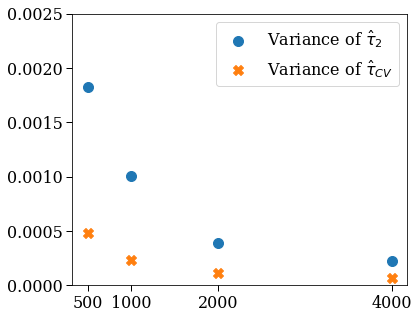

In [4]:
plot_var(ATE_var_list, ATE_CV_var_list, n_obs_list, ATE_estimator_type='reg', file_prefix='simple-log_ratio-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


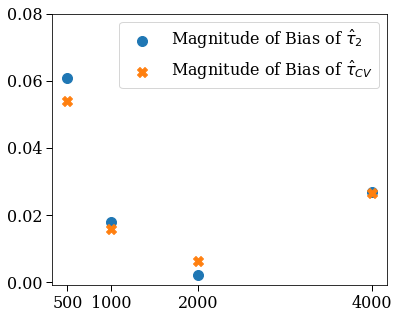

In [5]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_obs_list, ATE_estimator_type='reg', file_prefix='simple-log_ratio-fixed')

### Run simulation for varying observational dataset size, keeping selection bias size constant at 10000.

In [6]:
# Run simulation for varying n_obs, keeping n_bias constant at 10000.
n_obs_list = [500, 1000, 2000, 4000]
n_bias = 10000
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_obs in n_obs_list:
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=False)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=500, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0017013331063023755
>>> Bias of ATE estimator: 0.013021111107761024
>>> Variance of ATE estimator with CV: 0.0003136334708815791
>>> Bias of ATE estimator with CV: -0.004241733714050011
Running simulation for n_obs=1000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0006118916885214046
>>> Bias of ATE estimator: -0.007384004496745422
>>> Variance of ATE estimator with CV: 0.00016789189581372047
>>> Bias of ATE estimator with CV: -0.02190930016679732
Running simulation for n_obs=2000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0003585899007823243
>>> Bias of ATE estimator: -0.004613746675268066
>>> Variance of ATE estimator with CV: 0.00019614317575306623
>>> Bias of ATE estimator with CV: -0.0003298417047015445
Running

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


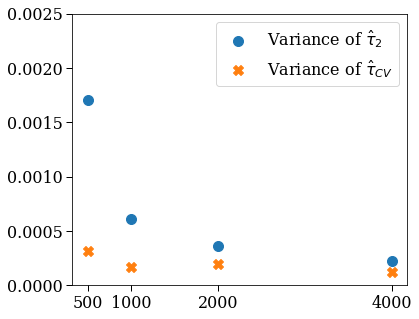

In [7]:
plot_var(ATE_var_list, ATE_CV_var_list, n_obs_list, ATE_estimator_type='reg', file_prefix='simple-log_n1-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


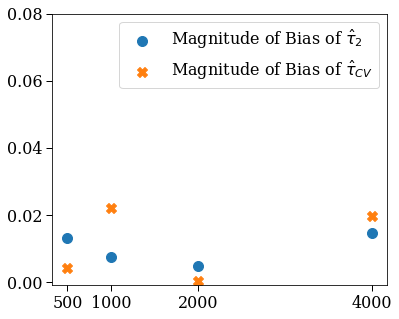

In [8]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_obs_list, ATE_estimator_type='reg', file_prefix='simple-log_n1-fixed')

### Run simulation for varying selection bias size, keeping observational dataset size constant at 1000.

In [9]:
# Run simulation for varying n2, keeping n1 constant at 1000.
n_obs = 1000
n_bias_list = [1000, 2000, 5000, 10000]
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_bias in n_bias_list:
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=False)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=1000, n_bias=1000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0009447050415568974
>>> Bias of ATE estimator: 0.001884218356057954
>>> Variance of ATE estimator with CV: 0.0006064765875573634
>>> Bias of ATE estimator with CV: -0.027744068218262752
Running simulation for n_obs=1000, n_bias=2000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0008604954474647848
>>> Bias of ATE estimator: -0.008935048362510467
>>> Variance of ATE estimator with CV: 0.0005179986832177035
>>> Bias of ATE estimator with CV: -0.006547265479214387
Running simulation for n_obs=1000, n_bias=5000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=False
>>> Variance of ATE estimator: 0.0008670147502570666
>>> Bias of ATE estimator: -0.005164195513080921
>>> Variance of ATE estimator with CV: 0.000332969347168615
>>> Bias of ATE estimator with CV: 0.007118215247291865
Running simul

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


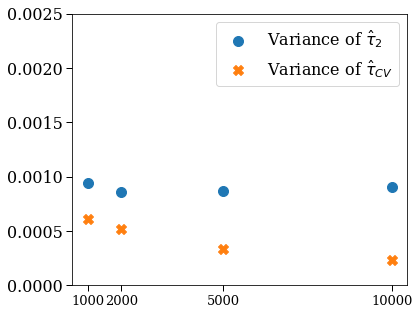

In [10]:
plot_var(ATE_var_list, ATE_CV_var_list, n_bias_list, xticks_fontsize_diff = -3, ATE_estimator_type='reg', file_prefix='simple-log_n2-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


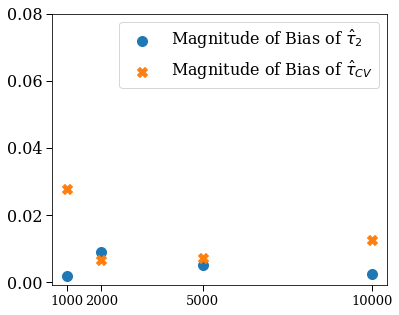

In [11]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_bias_list, xticks_fontsize_diff = -3, ATE_estimator_type='reg', file_prefix='simple-log_n2-fixed')

## 2. General logistic model with interactions between X and Z. <a name="tau_reg_general"></a>

This means we have a vector of control variates: one control variate for each value of X.

### Run simulation for varying observational dataset size, keeping the ratio of obs/selection bias constant.

In [3]:
# Run simulation for varying n1, keeping n1/n2 = 1/10.
n_obs_list = [500, 1000, 2000, 4000]
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_obs in n_obs_list:
    n_bias = n_obs * 10
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=True)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=500, n_bias=5000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.002071643339162325
>>> Bias of ATE estimator: 0.04085712125263391
>>> Variance of ATE estimator with CV: 0.0006016906955693847
>>> Bias of ATE estimator with CV: 0.004122669477987562
Running simulation for n_obs=1000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.0010269715705221812
>>> Bias of ATE estimator: -0.039811141150282364
>>> Variance of ATE estimator with CV: 0.0003258644313097898
>>> Bias of ATE estimator with CV: -0.020319644657555813
Running simulation for n_obs=2000, n_bias=20000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.00046825959524286666
>>> Bias of ATE estimator: -0.029046831096370462
>>> Variance of ATE estimator with CV: 0.0001808258321990903
>>> Bias of ATE estimator with CV: -0.0061662809575810384
Running simula

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


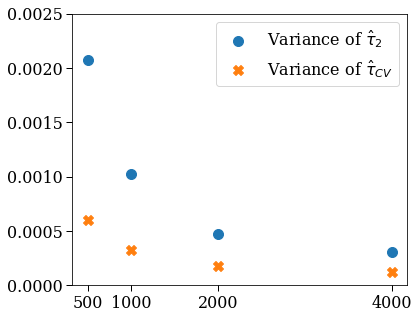

In [6]:
plot_var(ATE_var_list, ATE_CV_var_list, n_obs_list, ATE_estimator_type='reg', file_prefix='general-log_ratio-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


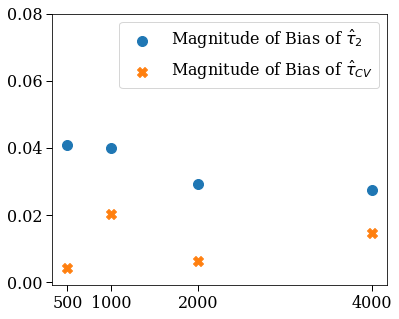

In [7]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_obs_list, ATE_estimator_type='reg', file_prefix='general-log_ratio-fixed')

### Run simulation for varying observational dataset size, keeping selection bias size constant at 10000.

In [8]:
# Run simulation for varying n1 (observational dataset), keeping n2 (selection bias) constant at 10000.
n_obs_list = [500, 1000, 2000, 4000]
n_bias = 10000
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_obs in n_obs_list:
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=True)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=500, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.0016880550174407528
>>> Bias of ATE estimator: -0.04471309735724219
>>> Variance of ATE estimator with CV: 0.00071318131770024
>>> Bias of ATE estimator with CV: -0.025805730514994712
Running simulation for n_obs=1000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.000864931087970997
>>> Bias of ATE estimator: -0.040342842883445834
>>> Variance of ATE estimator with CV: 0.0003481670186925822
>>> Bias of ATE estimator with CV: -0.008822694791696784
Running simulation for n_obs=2000, n_bias=10000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.00040912529242024013
>>> Bias of ATE estimator: -0.004554265224091081
>>> Variance of ATE estimator with CV: 0.0002051403879076861
>>> Bias of ATE estimator with CV: 0.026886165706352078
Running simulat

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


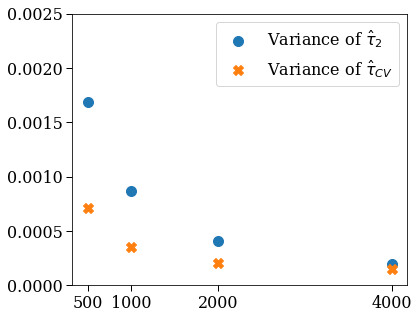

In [9]:
plot_var(ATE_var_list, ATE_CV_var_list, n_obs_list, ATE_estimator_type='reg', file_prefix='general-log_n1-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


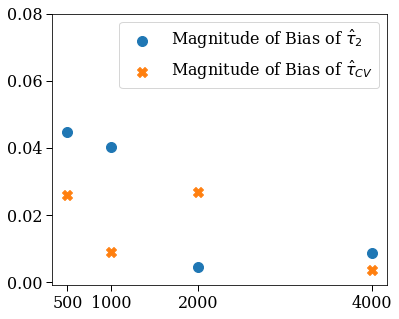

In [10]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_obs_list, ATE_estimator_type='reg', file_prefix='general-log_n1-fixed')

### Run simulation for varying selection bias size, keeping observational dataset size constant at 1000.

In [11]:
# Run simulation for varying n2 (selection bias), keeping n1 (obs) constant at 1000.
n_obs = 1000
n_bias_list = [1000, 2000, 5000, 10000]
ATE_var_list = []
ATE_bias_list = []
ATE_CV_var_list = []
ATE_CV_bias_list = []
for n_bias in n_bias_list:
    ATE_var, ATE_bias, ATE_CV_var, ATE_CV_bias = zhang_simulation.run_full_simulation(
        n_obs=n_obs, 
        n_bias=n_bias, 
        ATE_estimator_type='reg',
        CV_stratified=True)
    ATE_var_list.append(ATE_var)
    ATE_bias_list.append(ATE_bias)
    ATE_CV_var_list.append(ATE_CV_var)
    ATE_CV_bias_list.append(ATE_CV_bias)

Running simulation for n_obs=1000, n_bias=1000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.0009834215125082422
>>> Bias of ATE estimator: 0.005168803039794306
>>> Variance of ATE estimator with CV: 0.0005834626434603714
>>> Bias of ATE estimator with CV: -0.005809037472775197
Running simulation for n_obs=1000, n_bias=2000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.0009520095185690153
>>> Bias of ATE estimator: 0.015592735098155452
>>> Variance of ATE estimator with CV: 0.0004888526807218312
>>> Bias of ATE estimator with CV: 0.0015439657597207668
Running simulation for n_obs=1000, n_bias=5000, p0=0.10, p1=0.90, ATE_estimator_type=reg, CV_stratified=True
>>> Variance of ATE estimator: 0.001000628422880729
>>> Bias of ATE estimator: 0.007318757783077751
>>> Variance of ATE estimator with CV: 0.0003356374651210709
>>> Bias of ATE estimator with CV: 0.006245984132174781
Running simulation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


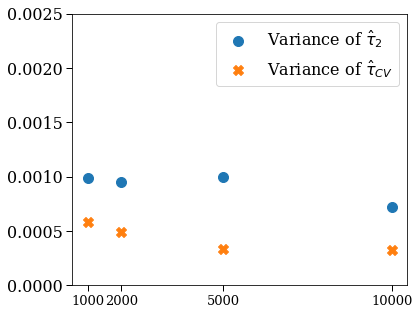

In [12]:
plot_var(ATE_var_list, ATE_CV_var_list, n_bias_list, xticks_fontsize_diff = -3, ATE_estimator_type='reg', file_prefix='general-log_n2-fixed')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


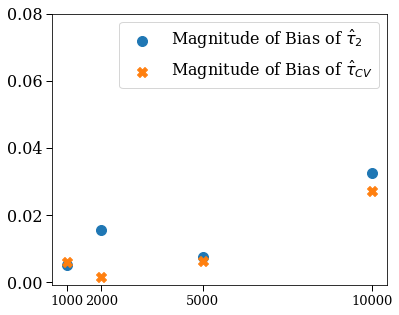

In [13]:
plot_bias(ATE_bias_list, ATE_CV_bias_list, n_bias_list, xticks_fontsize_diff = -3, ATE_estimator_type='reg', file_prefix='general-log_n2-fixed')